# Final Project Report

* Class: DS 5100
* Student Name: Emmanuel Gyamfi
* Student Net ID: asw4uc
* This URL: https://github.com/egyamfi6

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The ChanceRollers Module (A.K.A Monte Carlo) (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/d26clarke/DS5100-Project/tree/main

Paste a copy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

## die.py
<code>
    class Die:
    """
    A class representing a Die (2-Face: Die of type Coin or 6-Face Die )

    Attributes:
       
        _privateDataFrame (pd.DataFrame): Used to hold both die face and weight data points
    
    Methods:
        __init__():
        change_die_weight() 
        roll_die()
        die_state()
    """

    # Class attributes None

    # Instance attributes
    def __init__(self, theDie: np.array) -> None:
       
        """Initializes Die Class
           Initializes the weights to 1 for each die face
           Saves die faces and weights _privateDataFrame with die faces in the index

        Args:
            theDie (np.array):  NumPy array of Die faces where array dtype(strings|numbers)

        Raises:
            ValueError: If die faces are not distinct values
            TypeError: If die is not of type NumPy Array 

        Returns:
            None
        """

        #print(f"The Inital Type: {type(theDie)}")

        #Must be NumPy Array
        if not type(theDie) is np.ndarray:
            raise TypeError("The die must be of type NumPy Array!") 

        if ( len(np.unique(theDie)) !=  len(theDie) ):
            raise ValueError(f"The die must have distinct values! {theDie}")
        
        #Build Dynamic Index
        self.theDie = theDie

        self._privateDataFrame: pd.DataFrame = pd.DataFrame(self.theDie, columns=['dieValue'], index=theDie.tolist())


        for idx, row in self._privateDataFrame.iterrows():
            #Modify Face Value
            self._privateDataFrame.loc[idx] = 1.0
            #print(f"Index: {idx}")
            #print(f"Weight for {idx}: {row['dieValue']}")

    # Instance method change_die_weight
    def change_die_weight(self, face_name: str, new_weight: float) -> None:
        """
        Takes two arguments: face_name  new_weight
        Checks:  
            face_name: must exist in die array (If not, raises an IndexError)
            new_weight: must be of type float and castable as numeric (If not, raises a TypeError)

        Actions:
            If new weight is of type float, subtract 1 from new weight to obtain the percentage which will be distributed among the 
            remaining die faces

            If new weight is of type int, convert integer to float  then subtract 1 from generated float to obtain the percentage which will be distributed among the 
            remaining die faces

        Note(s):  Weights must sum to 1
        """
        
        #face_name must Exist in the die array
        if not (face_name in self._privateDataFrame.index):
             raise IndexError(f"{face_name} does not exist in the die array: ")
        #print(f"New Weight Type: {type(new_weight)}" )
        #new_weight must be numeric or castable as numeric
        if not isinstance(new_weight, (int, float)):  
            raise TypeError(f"new weight request must be of type integer or float: {new_weight}")
        
        #Modify the requested die face
        self._privateDataFrame.loc[face_name] = new_weight
    
    # Instance method roll_die
    def roll_die(self, how_many_times: int = 1) -> list:
        """
        Simulates a dice roll with weighted probabilities for each face.
        
        Arg Checks:  
            how_many_times: number of requested die rolls; default is 1 roll

        Returns:
            a python list of outcomes
        """

        print(f"Entering roll_die: {how_many_times}")
       
        outcomes: list = list()

        facesList: list = self._privateDataFrame.index.to_list()
        weightsList: list = self._privateDataFrame['dieValue'].to_list()

        for roll in range(how_many_times):
            
            #print(f"Roll Number: {roll + 1}")

            if ( (roll+1) == how_many_times):
                
                self._privateDataFrame.loc[facesList[0]:facesList[-1]] = 0.0

                outcomes.append(random.choices(facesList, weights=weightsList, k=1)[0])
                self._privateDataFrame.loc[outcomes[-1], 'dieValue'] = 1.0  #This will represent die state
                
            else:
                outcomes.append(random.choices(facesList, weights=weightsList, k=1)[0])
                    
        return outcomes
    
    # Instance method die_state
    def die_state(self) -> pd.DataFrame:
        """
        Takes no arguments
        
        Returns a copy of the private data frame
        """
        return self._privateDataFrame

</code>
## game.py
<code>
 import pandas as pd

import numpy as np

from theDie import Die

class Game:
    """
    A class representing a game of rolling one or more similar dice (Die objects) one or more times
    Game objects have a behavior to play a game, i.e. to roll all of the dice a given number of times
    Game objects only keep the results of their most recent play


    Attributes:
       
        self._privateGameDataFrame (pd.DataFrame): a private variable Used to hold game results
    
    Methods:
        play() 
        playResults()
    """

    def __init__(self, theDice: list[Die]) -> None:
        """Initializes Game Class with Python list, as a single paramter, that contains one or more dice

            self.theDice = theDice
            self._privateGameDataFrame = pd.DataFrame = pd.DataFrame(emptyDict)


        Args:
            theDice (list):  NumPy array of Die faces where array dtype(strings|numbers)

        Raises:
            TypeError: If container for Die objects is not of type list 
            TypeError: If list item is not a Die object

        Returns:
            None
        """
        
        #print(f"The Inital Type: {type(theDice)}")

        #Must be type list
        if not type(theDice) is list:
            raise TypeError("The container for the dice must be of type list!") 

        #List items must be Die Objects
        for item in theDice:
            if not isinstance(item, Die):
                raise TypeError(f"List element: {item} is not of type {Die.__name__} !")
            #dieStateDataFrame: pd.DataFrame = item.die_state()
            #print(f"Length of each Die: {len(item.die_state())}")
        
        self.theDice = theDice

        #Use this empty dictionay object for private pandas dataFrame
        emptyDict = {'RollNum': [],
        'DieId': [],
        'DieValue': []}

        self._privateGameDataFrame: pd.DataFrame = pd.DataFrame(emptyDict)

        
        #All Die objects in list must have the same number of faces
        checkCoinFaces: bool = all(len(x.die_state()) == 2 for x in theDice)   #Two Face Coin
        checkDieFaces: bool = all(len(x.die_state()) == 6 for x in theDice)   #Six Face Die
        checkAlphaDieFaces: bool = all(len(x.die_state()) == 26 for x in theDice)   #Alphabet Face Die

        #print(f"Staus of checkCoinFaces: {checkCoinFaces}\n")
        #print(f"Staus of checkDieFaces: {checkDieFaces}\n")

        #Raise error if die objects do not have the same number of faces
        if checkCoinFaces == False and checkDieFaces == False and checkAlphaDieFaces == False:
            #print(f"DEBUG1:We have an issue!\n")
            raise ValueError(f"All Die objects in list must have the same number of faces!")
        else:
            print(f"We are good to go!\n")
    
    
    def play(self, how_many_rolls: int) -> None:
        
        """Takes an integer parameter to specify how many times the dice should be rolled and 
            saves the result of the play to self._privateGameDataFrame

            Using the playResults methond, self._privateGameDataFrame will be returned 
            in wide format unless narrow form (n) is requested. 


        Args:
            how_many_rolls (int):  How many times to roll dice

        Raises:
            None

        Returns:
            None
        """

        print(f"Entering method play: Number of requested rolls ({how_many_rolls})\n")

        print(f"Number of Die in play: {len(self.theDice)}")

        ## Add a new row to df_empty
        #df_empty.loc[len(df_empty)] = [1, 1, 'Face2']

        allDieRollResults: list = []

        dieID: int = 1
        for item in self.theDice:
            dieRoll: list = item.roll_die(how_many_rolls)
            dieRollResults: list = [(i + 1, dieID, dieRoll[i]) for i in range(len(dieRoll))]
            allDieRollResults = allDieRollResults + dieRollResults
            dieID += 1

        #Save Results to private Dataframe with newly generated list
        self._privateGameDataFrame = pd.DataFrame(allDieRollResults, columns=['RollNum', 'DieId', 'DieValue'])



    def playResults(self, df_frame_type: str = 'w') -> pd.DataFrame:
        
        """Returns a copy of self._privateGameDataFrame in wide form (w) (DEFAULT) to the user 
           unless narrow form (n) is requested.

            Using the playResults methond, self._privateGameDataFrame will be returned 
            in wide format unless narrow form (n) is requested. 


        Args:
            df_frame_type (str):  parameter to return the data frame in narrow (n) or wide (w) form where wide is DEFAULT

        Raises:
            ValueError: if the user passes an invalid option for narrow or wide

        Returns:
            None
        """

        #print(f"Entering playResults...Requested Frame Type: {df_frame_type}")

        if (df_frame_type != "w") and (df_frame_type != "n"):
            raise ValueError(f"invalid option for (n)arrow or (w)ide: {df_frame_type}\n")

        if df_frame_type == "w":
            #Wide Format (DEFAULT)
            #print("Wide format DataFrame:\n", df_wide)
            return self._privateGameDataFrame.pivot(index='RollNum', columns='DieId', values='DieValue')
        elif df_frame_type == "n":
            #Narrow Format
            #return pd.MultiIndex.from_frame(self._privateGameDataFrame)
            return self._privateGameDataFrame.set_index(['RollNum', 'DieId'])
            
</code>
## analyzer.py
<code>
 import pandas as pd

import numpy as np

from theDie.die import Die
from game.game import Game

class Analyzer:
    """
    A class that provides descriptive statistical properties about a game object


    Attributes:
       
        None
    
    Methods:
        jackpots() 
        dieFaceCounter()
        dieComboCounter()
        diePermutationCounter()
    """

    def __init__(self, theGame: Game) -> None:
        """Initializes Analyzer Class with a Game object, as a single paramter

            self.theGame = theGame

        Args:
            theGame (Game):  Game object with game results

        Raises:
            ValueError: If the parameter is not a Game object

        Returns:
            None
        """
        
        print(f"The Inital Type: {type(theGame)}")

        #Must be type Game
        if not type(theGame) is Game:
            raise ValueError("The parameter must be of type Game!") 
        
        self.theGame = theGame

        print(f"Game Results (WideFormat): \n{self.theGame.playResults()}")
        print(f"Game Results (NarrowFormat): \n{self.theGame.playResults("n")}")


    
    def jackpots(self) -> int:
        
        """Computes how many times the game resulted in a jackpot 

            A jackpot is a result in which all faces are the same, e.g. all ones for a six-sided die



        Args:
            None

        Raises:
            None

        Returns:
            None
        """

        print(f"Entering method jackpots... \n")

        numberOfJackpots: int = 0

        #Load play Results
        diePlayResultsFrame: pd.DataFrame = self.theGame.playResults("w")
        print(f"The DataFrame to examine for jackpot notifications: \n{diePlayResultsFrame}")

        #Check all rows in this dataframe
        rowsInDataFrame: int = len(diePlayResultsFrame)
        
        #Use the following for Loop to get to each Series 
        for rowIdx in range(1,rowsInDataFrame + 1):
            duplicates: pd.Series = diePlayResultsFrame.loc[rowIdx].duplicated()
            num_duplicates: np.int64 = duplicates.sum()
            if len(diePlayResultsFrame.loc[rowIdx]) == num_duplicates + 1:
                #We have a jackpot
                numberOfJackpots += 1
        
        return numberOfJackpots

    def dieFaceCounter(self) -> pd.DataFrame:
        
        """Computes how many times a given face is rolled in each event.
           
            For Example:
            If a roll of five dice has all sixes, 
            then the counts for this roll would be 5 for the face value 6 and 0 for the other faces


        Args:
            None

        Raises:
            None

        Returns:
            pd.DataFrame of results
        """

        print(f"Entering dieFaceCounter...")


        print(f"DEBUG TEST: \n {self.theGame.playResults("w").apply(pd.Series.value_counts, axis=1).fillna(0).astype(int)}")

        
        df_ForFaceCounts: pd.DataFrame = self.theGame.playResults("w").apply(pd.Series.value_counts, axis=1).fillna(0).astype(int)

        #Set Index Name
        df_ForFaceCounts.index.name = "RollNum"
        
        #print(f"Reset: {diePlayResultsFrame.reset_index()}")
        #print(f"Face Counts DataFrame: \n{df_ForFaceCounts}")

        return df_ForFaceCounts


    def dieComboCounter(self) -> pd.DataFrame:
        
        """Computes the distinct combinations of faces rolled, along with their counts
           
            NOTE:  Combinations are order-independent and may contain repetitions
                   The data frame should have a MultiIndex of distinct combinations and a column for the associated counts


        Args:
            None

        Raises:
            None

        Returns:
            pd.DataFrame of results
        """

        print(f"Entering dieComboCounter...") 

         #Load play Results
        diePlayResultsFrame: pd.DataFrame = self.theGame.playResults("w")

       
        dfMultiIndex: pd.DataFrame = diePlayResultsFrame.apply(lambda x: pd.Series(sorted(x)), 1).value_counts().to_frame('Occurrence')
        dfMultiIndex.index.names = ["DieValue:"+str(i) for i in range(1, len(diePlayResultsFrame.columns.to_list())+1)]

        return dfMultiIndex
    

    def diePermutationCounter(self) -> pd.DataFrame:
        
        """Computes the distinct permutations of faces rolled, along with their counts
           
            NOTE:  Permutations are order-dependent and may contain repetitions
                   The data frame should have a MultiIndex of distinct permutations and a column for the associated counts


        Args:
            None

        Raises:
            None

        Returns:
            pd.DataFrame of results
        """

        print(f"Entering diePermutationCounter...") 

        #Load play Results
        diePlayResultsFrame: pd.DataFrame = self.theGame.playResults("w")

        dfMultiIndex = diePlayResultsFrame.set_index(diePlayResultsFrame.columns.to_list(), append=True)
        dfMultiIdxPermCnt = dfMultiIndex.groupby(diePlayResultsFrame.columns.to_list()).size().to_frame("Occurence")

        return dfMultiIdxPermCnt 
</code>

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

## die_test.py
<code>
from die import Die
import unittest
import numpy as np


# Create variable to capture results when necessary
results: str = ""

class DieTestSuite(unittest.TestCase):
  
  def test_1_check_distinct_die_weights(self): 

    with self.assertRaises(ValueError):
      #Generate ValueError by passing numpy array argument that contains a set of non-distinct items  
      theDie: np.array = np.array(['1', '1', '3', '4', '5', '6'], dtype=str)
      Die(theDie)

  def test_2_change_die_weight(self): 

    with self.assertRaises(IndexError):
      theDie: np.array = np.array(['1', '2', '3', '4', '5', '6'], dtype=str)
      myInstance: Die = Die(theDie)
      #Generate IndexError by passing a non-existent face_name argument
      myInstance.change_die_weight('9', .30)

  def test_3_change_die_weight(self): 

    
    with self.assertRaises(TypeError):
      theDie: np.array = np.array(['1', '2', '3', '4', '5', '6'], dtype=str)
      myInstance: Die = Die(theDie)
      #Generate TypeError by passing new_weight argument as a string
      myInstance.change_die_weight('3', '30')


    
    
        

  
                

if __name__ == '__main__':
    unittest.main(verbosity=3) 
</code>

## game_test.py
<code>
 from game import Game
import unittest
import numpy as np

from theDie.die import Die



# Create variable to capture results when necessary
results: str = ""

class GameTestSuite(unittest.TestCase):
  
    def test_1_check_is_container_list(self): 

        with self.assertRaises(TypeError):
        #Generate TypeError by passing a set object
            listDieOne: np.array = np.array(['1', '2', '3', '4', '5', '6'], dtype=str)

            dieOneInstance: Die = Die(listDieOne)

            diceList: set = ((dieOneInstance))
            Game(diceList)

    def test_2_check_if_die_object(self): 

        with self.assertRaises(TypeError):
        #Generate TypeError by passing a set object
            listDieOne: np.array = np.array(['1', '2', '3', '4', '5', '6'], dtype=str)
            listDieTwo: np.array = np.array(['1', '2', '3', '4', '5', '6'], dtype=str)
            listDieThree: np.array = np.array(['1', '2', '3', '4', '5', '6'], dtype=str)

            diceList: set = [listDieOne, listDieTwo, listDieThree]
            Game(diceList)


    def test_3_change_die_weight(self): 

    
        with self.assertRaises(ValueError):
            #Generate ValueError by passing an invalid option for narrow or wide
            listDieOne: np.array = np.array(['1', '2', '3', '4', '5', '6'], dtype=str)
            listDieTwo: np.array = np.array(['1', '2', '3', '4', '5', '6'], dtype=str)
            listDieThree: np.array = np.array(['1', '2', '3', '4', '5', '6'], dtype=str)

            dieOneInstance: Die = Die(listDieOne)
            dieTwoInstance: Die = Die(listDieTwo)
            dieThreeInstance: Die = Die(listDieThree)


            #Manage Die weighting
            dieOneInstance.change_die_weight('2', .40)
            dieTwoInstance.change_die_weight('2', .30)
            dieThreeInstance.change_die_weight('2', .20)

            diceList: list = [dieOneInstance, dieTwoInstance, dieThreeInstance]
            myInstance: Game = Game(diceList)

            #Let it roll!
            myInstance.play(2)

            #The Results
            myInstance.playResults("x")

    
    def test_4_check_die_faces(self): 

    
        with self.assertRaises(ValueError):
            
            #Generate ValueError if all die have the same faces
            
            # The Die
            listDieOne: np.array = np.array(['1', '2', '3', '4', '5', '6'], dtype=str)
            listDieTwo: np.array = np.array(['1', '2', '3', '4', '5', '6'], dtype=str)
            listDieThree: np.array = np.array(['1', '2', '3', '4', '5', '6'], dtype=str)
            listDieFour: np.array = np.array(['1', '2'], dtype=str)

            dieOneInstance: Die = Die(listDieOne)
            dieTwoInstance: Die = Die(listDieTwo)
            dieThreeInstance: Die = Die(listDieThree)
            dieFourInstance: Die = Die(listDieFour)

            #Manage Die weighting
            dieOneInstance.change_die_weight('2', .40)
            dieTwoInstance.change_die_weight('2', .30)
            dieThreeInstance.change_die_weight('2', .20)

            diceList: list = [dieOneInstance, dieTwoInstance, dieThreeInstance, dieFourInstance]
            myInstance: Game = Game(diceList)

            #Let it roll!
            myInstance.play(2)

            #The Results
            myInstance.playResults("x")



    
    
        

  
                

if __name__ == '__main__':
    unittest.main(verbosity=3)%  
</code>

## analyze_test.py
<code>
from analyzer import Analyzer
import unittest
import numpy as np

from theDie.die import Die
from game.game import Game



# Create variable to capture results when necessary
results: str = ""

class AnalyzeTestSuite(unittest.TestCase):
  
    def test_1_check_is_game_object(self): 

        with self.assertRaises(ValueError):
            #Generate ValueError by passing an invalid game object
            # The Die
            listDieOne: np.array = np.array(['1', '2', '3', '4', '5', '6'], dtype=str)
            listDieTwo: np.array = np.array(['1', '2', '3', '4', '5', '6'], dtype=str)
            listDieThree: np.array = np.array(['1', '2', '3', '4', '5', '6'], dtype=str)
            #listDieFour: np.array = np.array([1.0, 2.0], dtype=float)

            dieOneInstance: Die = Die(listDieOne)
            dieTwoInstance: Die = Die(listDieTwo)
            dieThreeInstance: Die = Die(listDieThree)
            #dieFourInstance: Die = Die(listDieFour)

            #Manage Die weighting
            dieOneInstance.change_die_weight('2', .20)
            dieTwoInstance.change_die_weight('2', .20)
            dieThreeInstance.change_die_weight('2', .20)

            diceList: list = [dieOneInstance, dieTwoInstance, dieThreeInstance]

            myErrorInstance: list = list(diceList)
            
            myAnalyerErr: Analyzer = Analyzer(myErrorInstance)

                    

if __name__ == '__main__':
    unittest.main(verbosity=3)
</code>

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

In [45]:
!python /Users/ddclarke/development/python/uvaMSDS/DS5100/finalProject/chanceRollers/theDie/die_test.py

test_1_check_distinct_die_weights (__main__.DieTestSuite.test_1_check_distinct_die_weights) ... ok
test_2_change_die_weight (__main__.DieTestSuite.test_2_change_die_weight) ... ok
test_3_change_die_weight (__main__.DieTestSuite.test_3_change_die_weight) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.008s

OK


In [46]:
!python /Users/ddclarke/development/python/uvaMSDS/DS5100/finalProject/chanceRollers/game/game_test.py

test_1_check_is_container_list (__main__.GameTestSuite.test_1_check_is_container_list) ... ok
test_2_check_if_die_object (__main__.GameTestSuite.test_2_check_if_die_object) ... ok
test_3_change_die_weight (__main__.GameTestSuite.test_3_change_die_weight) ... We are good to go!

Entering method play: Number of requested rolls (2)

Number of Die in play: 3
Entering roll_die: 2
Entering roll_die: 2
Entering roll_die: 2
ok
test_4_check_die_faces (__main__.GameTestSuite.test_4_check_die_faces) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.010s

OK


In [47]:
!python /Users/ddclarke/development/python/uvaMSDS/DS5100/finalProject/chanceRollers/analyze/analyze_test.py

test_1_check_is_game_object (__main__.AnalyzeTestSuite.test_1_check_is_game_object) ... The Inital Type: <class 'list'>
ok

----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [1]:
from theDie.die import Die
from analyze.analyzer import Analyzer
from game.game import Game

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [2]:
help(Die)

Help on class Die in module theDie.die:

class Die(builtins.object)
 |  Die(theDie: <built-in function array>) -> None
 |
 |  A class representing a Die (2-Face: Die of type Coin or 6-Face Die )
 |
 |  Attributes:
 |
 |      _privateDataFrame (pd.DataFrame): Used to hold both die face and weight data points
 |
 |  Methods:
 |      __init__():
 |      change_die_weight()
 |      roll_die()
 |      die_state()
 |
 |  Methods defined here:
 |
 |  __init__(self, theDie: <built-in function array>) -> None
 |      Initializes Die Class
 |         Initializes the weights to 1 for each die face
 |         Saves die faces and weights _privateDataFrame with die faces in the index
 |
 |      Args:
 |          theDie (np.array):  NumPy array of Die faces where array dtype(strings|numbers)
 |
 |      Raises:
 |          ValueError: If die faces are not distinct values
 |          TypeError: If die is not of type NumPy Array
 |
 |      Returns:
 |          None
 |
 |  change_die_weight(self, face_na

In [3]:
help(Game)

Help on class Game in module game.game:

class Game(builtins.object)
 |  Game(theDice: list[theDie.die.Die]) -> None
 |
 |  A class representing a game of rolling one or more similar dice (Die objects) one or more times
 |  Game objects have a behavior to play a game, i.e. to roll all of the dice a given number of times
 |  Game objects only keep the results of their most recent play
 |
 |
 |  Attributes:
 |
 |      self._privateGameDataFrame (pd.DataFrame): a private variable Used to hold game results
 |
 |  Methods:
 |      play()
 |      playResults()
 |
 |  Methods defined here:
 |
 |  __init__(self, theDice: list[theDie.die.Die]) -> None
 |      Initializes Game Class with Python list, as a single paramter, that contains one or more dice
 |
 |          self.theDice = theDice
 |          self._privateGameDataFrame = pd.DataFrame = pd.DataFrame(emptyDict)
 |
 |
 |      Args:
 |          theDice (list):  NumPy array of Die faces where array dtype(strings|numbers)
 |
 |      Raises:
 

In [4]:
help(Analyzer)

Help on class Analyzer in module analyze.analyzer:

class Analyzer(builtins.object)
 |  Analyzer(theGame: game.game.Game) -> None
 |
 |  A class that provides descriptive statistical properties about a game object
 |
 |
 |  Attributes:
 |
 |      None
 |
 |  Methods:
 |      jackpots()
 |      dieFaceCounter()
 |      dieComboCounter()
 |      diePermutationCounter()
 |
 |  Methods defined here:
 |
 |  __init__(self, theGame: game.game.Game) -> None
 |      Initializes Analyzer Class with a Game object, as a single paramter
 |
 |          self.theGame = theGame
 |
 |      Args:
 |          theGame (Game):  Game object with game results
 |
 |      Raises:
 |          ValueError: If the parameter is not a Game object
 |
 |      Returns:
 |          None
 |
 |  dieComboCounter(self) -> pandas.core.frame.DataFrame
 |      Computes the distinct combinations of faces rolled, along with their counts
 |
 |          NOTE:  Combinations are order-independent and may contain repetitions
 |       

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL:https://github.com/d26clarke/DS5100-Project/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

In [49]:
!pip install -e /Users/ddclarke/development/python/uvaMSDS/DS5100/finalProject

Obtaining file:///Users/ddclarke/development/python/uvaMSDS/DS5100/finalProject
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for Chance-Rollers (pyproject.toml) ... done
  Created wheel for Chance-Rollers: filename=chance_rollers-3.0-0.editable-py3-none-any.whl size=2316 sha256=5bb8d1d5660d062b6c1e85e4e42b35dd69854159b2afe9a63db00007d84a0b3d
  Stored in directory: /private/var/folders/g1/14syr21d3p5c9zssvd3kj8mc0000gp/T/pip-ephem-wheel-cache-xg9jc_wu/wheels/50/65/9e/3d7a30ce1e1a1d18079760a2354f0e757043ece96d8c58975c
Successfully built Chance-Rollers
  Attempting uninstall: Chance-Rollers
    Found existing installation: Chance-Rollers 3.0
    Uninstalling Chance-Rollers-3.0:
      Successfully uninstalled Chance-Rollers-3.0


# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [10]:
import numpy as np

# The Coin
theCoin: np.array = np.array(['H', 'T'], dtype=str)

# Instantiate the Die class
myCoinInstance: Die = Die(theCoin)

#Fair Coin
myCoinInstance.change_die_weight('H', .50)
print(f"Fair Coin State: \n{myCoinInstance.die_state()}")

#Unfair Coin
myCoinInstance.change_die_weight('H', .60)
print(f"UnFair Coin State: \n{myCoinInstance.die_state()}")

Fair Coin State: 
  dieValue
H      0.5
T      1.0
UnFair Coin State: 
  dieValue
H      0.6
T      1.0


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [11]:
import numpy as np

# The Die
listDieOne: np.array = np.array(['1', '2', '3', '4', '5', '6'], dtype=str)
listDieTwo: np.array = np.array(['1', '2', '3', '4', '5', '6'], dtype=str)

dieOneInstance: Die = Die(listDieOne)
dieTwoInstance: Die = Die(listDieTwo)

diceList: list = [dieOneInstance, dieTwoInstance]
myInstance: Game = Game(diceList)

#Let it roll!
myInstance.play(1000)

We are good to go!

Entering method play: Number of requested rolls (1000)

Number of Die in play: 2
Entering roll_die: 1000
Entering roll_die: 1000


Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [12]:
import numpy as np

# The Die
listDieOne: np.array = np.array(['1', '2', '3', '4', '5', '6'], dtype=str)
listDieTwo: np.array = np.array(['1', '2', '3', '4', '5', '6'], dtype=str)

dieOneInstance: Die = Die(listDieOne)
dieTwoInstance: Die = Die(listDieTwo)

diceList: list = [dieOneInstance, dieTwoInstance]
myInstance: Game = Game(diceList)
myInstance2: Game = Game(diceList)

#Let it roll!
myInstance.play(1000)
myInstance2.play(1000)

We are good to go!

We are good to go!

Entering method play: Number of requested rolls (1000)

Number of Die in play: 2
Entering roll_die: 1000
Entering roll_die: 1000
Entering method play: Number of requested rolls (1000)

Number of Die in play: 2
Entering roll_die: 1000
Entering roll_die: 1000


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [15]:
#Using the myInstance object from task 3
myAnalyzerInstance: Analyzer = Analyzer(myInstance)
myAnalyzerInstance2: Analyzer = Analyzer(myInstance2)

#Jackot Information
print(f"Number of jackpots Game 1? \n{myAnalyzerInstance.jackpots()}")
print(f"Number of jackpots Game 2? \n{myAnalyzerInstance2.jackpots()}")

The Inital Type: <class 'game.game.Game'>
Game Results (WideFormat): 
DieId    1  2
RollNum      
1        3  6
2        3  1
3        2  6
4        4  2
5        1  6
...     .. ..
996      2  6
997      6  5
998      1  1
999      2  5
1000     1  4

[1000 rows x 2 columns]
Game Results (NarrowFormat): 
              DieValue
RollNum DieId         
1       1            3
2       1            3
3       1            2
4       1            4
5       1            1
...                ...
996     2            6
997     2            5
998     2            1
999     2            5
1000    2            4

[2000 rows x 1 columns]
The Inital Type: <class 'game.game.Game'>
Game Results (WideFormat): 
DieId    1  2
RollNum      
1        1  4
2        1  4
3        1  4
4        1  4
5        1  4
...     .. ..
996      1  4
997      1  4
998      1  4
999      1  4
1000     1  4

[1000 rows x 2 columns]
Game Results (NarrowFormat): 
              DieValue
RollNum DieId         
1       1       

Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

We are good to go!

We are good to go!

We are good to go!

We are good to go!

Entering method play: Number of requested rolls (1000)

Number of Die in play: 3
Entering roll_die: 1000
Entering roll_die: 1000
Entering roll_die: 1000
Entering method play: Number of requested rolls (1000)

Number of Die in play: 3
Entering roll_die: 1000
Entering roll_die: 1000
Entering roll_die: 1000
Entering method play: Number of requested rolls (1000)

Number of Die in play: 3
Entering roll_die: 1000
Entering roll_die: 1000
Entering roll_die: 1000
Entering method play: Number of requested rolls (1000)

Number of Die in play: 3
Entering roll_die: 1000
Entering roll_die: 1000
Entering roll_die: 1000
The Inital Type: <class 'game.game.Game'>
Game Results (WideFormat): 
DieId    1  2  3
RollNum         
1        2  1  5
2        5  3  2
3        6  3  2
4        4  5  5
5        5  3  4
...     .. .. ..
996      5  1  1
997      4  4  2
998      5  4  1
999      6  3  4
1000     3  1  5

[1000 rows x 3 c

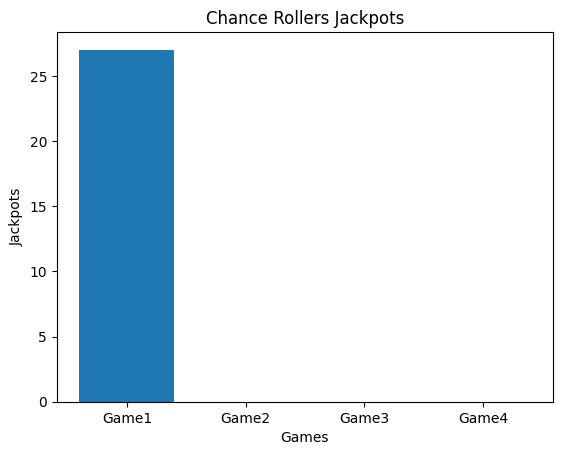

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# The Die
listDieOne: np.array = np.array(['1', '2', '3', '4', '5', '6'], dtype=str)
listDieTwo: np.array = np.array(['1', '2', '3', '4', '5', '6'], dtype=str)
listDieThree: np.array = np.array(['1', '2', '3', '4', '5', '6'], dtype=str)

dieOneInstance: Die = Die(listDieOne)
dieTwoInstance: Die = Die(listDieTwo)
dieThreeInstance: Die = Die(listDieThree)

#Manage Die weighting
dieOneInstance.change_die_weight('2', .40)
dieTwoInstance.change_die_weight('2', .30)

diceList: list = [dieOneInstance, dieTwoInstance, dieThreeInstance]

gameOne: Game = Game(diceList)
gameTwo: Game = Game(diceList)
gameThree: Game = Game(diceList)
gameFour: Game = Game(diceList)

#Game on!
gameOne.play(1000)
gameTwo.play(1000)
gameThree.play(1000)
gameFour.play(1000)

gameOneAnalyzerInstance: Analyzer = Analyzer(gameOne)
gameTwoAnalyzerInstance: Analyzer = Analyzer(gameTwo)
gameThreeAnalyzerInstance: Analyzer = Analyzer(gameThree)
gameFourAnalyzerInstance: Analyzer = Analyzer(gameFour)

#Build Game Analyzer List
games: list = ['Game1', 'Game2', 'Game3', 'Game4']
print(f"Games List: {games}")
#Build Jackpot List
#print(f"Number of jackpots? \n{myAnalyzerInstance.jackpots()}")
jackpotsPerGame: list = [gameOneAnalyzerInstance.jackpots(), gameTwoAnalyzerInstance.jackpots(), gameThreeAnalyzerInstance.jackpots(), gameFourAnalyzerInstance.jackpots()]
print(f"Jackpots List: {jackpotsPerGame}")

plt.bar(games, jackpotsPerGame)
plt.title('Chance Rollers Jackpots')
plt.xlabel('Games')
plt.ylabel('Jackpots')
plt.show()


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

The Inital Type: <class 'game.game.Game'>
Game Results (WideFormat): 
DieId    1  2
RollNum      
1        3  6
2        3  1
3        2  6
4        4  2
5        1  6
...     .. ..
996      2  6
997      6  5
998      1  1
999      2  5
1000     1  4

[1000 rows x 2 columns]
Game Results (NarrowFormat): 
              DieValue
RollNum DieId         
1       1            3
2       1            3
3       1            2
4       1            4
5       1            1
...                ...
996     2            6
997     2            5
998     2            1
999     2            5
1000    2            4

[2000 rows x 1 columns]
The Inital Type: <class 'game.game.Game'>
Game Results (WideFormat): 
DieId    1  2
RollNum      
1        1  4
2        1  4
3        1  4
4        1  4
5        1  4
...     .. ..
996      1  4
997      1  4
998      1  4
999      1  4
1000     1  4

[1000 rows x 2 columns]
Game Results (NarrowFormat): 
              DieValue
RollNum DieId         
1       1       

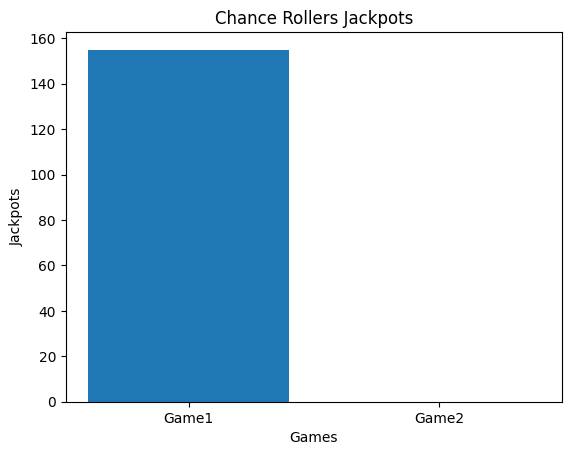

In [17]:
#Using the myInstance object from task 3
myAnalyzerInstance: Analyzer = Analyzer(myInstance)
myAnalyzerInstance2: Analyzer = Analyzer(myInstance2)

#Jackot Information
print(f"Number of jackpots Game 1? \n{myAnalyzerInstance.jackpots()}")
print(f"Number of jackpots Game 2? \n{myAnalyzerInstance2.jackpots()}")

#Build Game Analyzer List
games: list = ['Game1', 'Game2']

#Build Jackpot List
jackpotsPerGame: list = [myAnalyzerInstance.jackpots(), myAnalyzerInstance2.jackpots()]

plt.bar(games, jackpotsPerGame)
plt.title('Chance Rollers Jackpots')
plt.xlabel('Games')
plt.ylabel('Jackpots')
plt.show()

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [18]:
# The Die
listDieOne: np.array = np.array(['1', '2', '3', '4', '5', '6'], dtype=str)
listDieTwo: np.array = np.array(['1', '2', '3', '4', '5', '6'], dtype=str)
listDieThree: np.array = np.array(['1', '2', '3', '4', '5', '6'], dtype=str)

dieOneInstance: Die = Die(listDieOne)
dieTwoInstance: Die = Die(listDieTwo)
dieThreeInstance: Die = Die(listDieThree)

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [19]:
#Manage Die weighting
dieOneInstance.change_die_weight('6', .83)

Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [20]:
#Manage Die weighting
dieTwoInstance.change_die_weight('1', .83)

Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [21]:
# The Die
listDieOne: np.array = np.array(['1', '2', '3', '4', '5', '6'], dtype=str)
listDieTwo: np.array = np.array(['1', '2', '3', '4', '5', '6'], dtype=str)
listDieThree: np.array = np.array(['1', '2', '3', '4', '5', '6'], dtype=str)
listDieFour: np.array = np.array(['1', '2', '3', '4', '5', '6'], dtype=str)
listDieFive: np.array = np.array(['1', '2', '3', '4', '5', '6'], dtype=str)

dieOneInstance: Die = Die(listDieOne)
dieTwoInstance: Die = Die(listDieTwo)
dieThreeInstance: Die = Die(listDieThree)
dieFourInstance: Die = Die(listDieFour)
dieFiveInstance: Die = Die(listDieFive)

diceList: list = [dieOneInstance, dieTwoInstance, dieThreeInstance, dieFourInstance, dieFiveInstance]
myGameOneInstance: Game = Game(diceList)

#Let it roll!
myGameOneInstance.play(10000)

We are good to go!

Entering method play: Number of requested rolls (10000)

Number of Die in play: 5
Entering roll_die: 10000
Entering roll_die: 10000
Entering roll_die: 10000
Entering roll_die: 10000
Entering roll_die: 10000


Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [22]:
# The Die
listDieOne: np.array = np.array(['1', '2', '3', '4', '5', '6'], dtype=str)
listDieTwo: np.array = np.array(['1', '2', '3', '4', '5', '6'], dtype=str)
listDieThree: np.array = np.array(['1', '2', '3', '4', '5', '6'], dtype=str)
listDieFour: np.array = np.array(['1', '2', '3', '4', '5', '6'], dtype=str)
listDieFive: np.array = np.array(['1', '2', '3', '4', '5', '6'], dtype=str)

dieOneInstance: Die = Die(listDieOne)
dieTwoInstance: Die = Die(listDieTwo)
dieThreeInstance: Die = Die(listDieThree)
dieFourInstance: Die = Die(listDieFour)
dieFiveInstance: Die = Die(listDieFive)

#Manage Die weighting
dieOneInstance.change_die_weight('6', .83)
dieTwoInstance.change_die_weight('1', .83)

diceList: list = [dieOneInstance, dieTwoInstance, dieThreeInstance, dieFourInstance, dieFiveInstance]
myGameTwoInstance: Game = Game(diceList)

#Let it roll!
myGameTwoInstance.play(10000)

We are good to go!

Entering method play: Number of requested rolls (10000)

Number of Die in play: 5
Entering roll_die: 10000
Entering roll_die: 10000
Entering roll_die: 10000
Entering roll_die: 10000
Entering roll_die: 10000


Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

The Inital Type: <class 'game.game.Game'>
Game Results (WideFormat): 
DieId    1  2  3  4  5
RollNum               
1        2  2  3  1  2
2        3  2  5  1  2
3        6  6  5  3  1
4        6  3  2  2  5
5        3  1  2  5  3
...     .. .. .. .. ..
9996     6  2  5  6  2
9997     3  2  3  4  6
9998     2  5  1  2  3
9999     4  3  5  2  6
10000    1  1  5  2  2

[10000 rows x 5 columns]
Game Results (NarrowFormat): 
              DieValue
RollNum DieId         
1       1            2
2       1            3
3       1            6
4       1            6
5       1            3
...                ...
9996    5            2
9997    5            6
9998    5            3
9999    5            6
10000   5            2

[50000 rows x 1 columns]
The Inital Type: <class 'game.game.Game'>
Game Results (WideFormat): 
DieId    1  2  3  4  5
RollNum               
1        4  4  6  2  4
2        4  4  1  3  2
3        1  6  3  4  6
4        4  2  5  4  2
5        2  1  5  5  5
...     .. .. .. ..

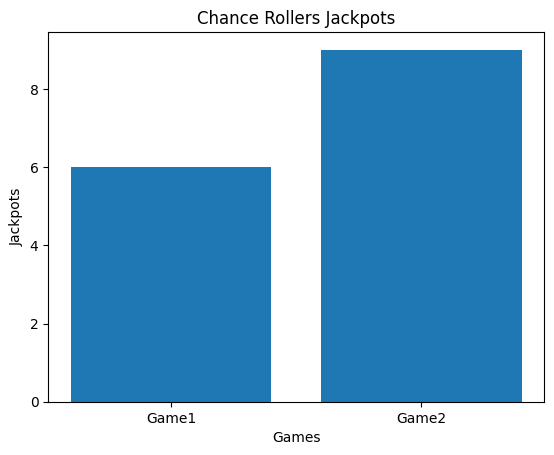

In [23]:
gameOneAnalyzerInstance: Analyzer = Analyzer(myGameOneInstance)
gameTwoAnalyzerInstance: Analyzer = Analyzer(myGameTwoInstance)

#Build Game Analyzer List
games: list = ['Game1', 'Game2']
print(f"Games List: {games}")
#Build Jackpot List
#print(f"Number of jackpots? \n{myAnalyzerInstance.jackpots()}")
jackpotsPerGame: list = [gameOneAnalyzerInstance.jackpots(), gameTwoAnalyzerInstance.jackpots()]
print(f"Jackpots List: {jackpotsPerGame}")

plt.bar(games, jackpotsPerGame)
plt.title('Chance Rollers Jackpots')
plt.xlabel('Games')
plt.ylabel('Jackpots')
plt.show()

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [24]:
import pandas as pd
df = pd.read_table("english_letters.txt", sep=" ", header=None)

#Add New Column Called Frequency Weights
df['Weights'] = df[1] / df[1].sum()

#Set Column names
df.columns = ['Face', 'Frequency', 'Weight']

alphabetDie: np.array = np.array(df['Face'].to_list(), dtype=str)

alphabetDieInstance: Die = Die(alphabetDie)

#Set alphabetDie weighting for die
for row in df.itertuples():
    alphabetDieInstance.change_die_weight(row.Face, row.Weight)


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [25]:
#Build three (3) more Alphabet Die

alphabetDie2: np.array = np.array(df['Face'].to_list(), dtype=str)
alphabetDie3: np.array = np.array(df['Face'].to_list(), dtype=str)
alphabetDie4: np.array = np.array(df['Face'].to_list(), dtype=str)

alphabetDie2Instance: Die = Die(alphabetDie2)
alphabetDie3Instance: Die = Die(alphabetDie3)
alphabetDie4Instance: Die = Die(alphabetDie4)

#Set alphabetDie weighting for the three die
for row2 in df.itertuples():
    #print(f"Row Index: {row2.Index}")
    #print(f"Type: {type(row2)}")
    #print(f"Length: {len(row2)}")
    #print(f"Face: {row2.Face} - Frequency: {row2.Frequency} - Weight: {row.Weight}")
    alphabetDie2Instance.change_die_weight(row2.Face, row2.Weight)
    alphabetDie3Instance.change_die_weight(row2.Face, row2.Weight)
    alphabetDie4Instance.change_die_weight(row2.Face, row2.Weight)

alphabetDieList: list = [alphabetDieInstance, alphabetDie2Instance, alphabetDie3Instance, alphabetDie4Instance]
myAlphabetLtrGameInstance: Game = Game(alphabetDieList)

#Let it roll!
myAlphabetLtrGameInstance.play(1000)

We are good to go!

Entering method play: Number of requested rolls (1000)

Number of Die in play: 4
Entering roll_die: 1000
Entering roll_die: 1000
Entering roll_die: 1000
Entering roll_die: 1000


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [26]:
alphabetAnalyzerInstance: Analyzer = Analyzer(myAlphabetLtrGameInstance)
print(f"Play Results(Wide Format): \n{alphabetAnalyzerInstance.diePermutationCounter()}")

The Inital Type: <class 'game.game.Game'>
Game Results (WideFormat): 
DieId    1  2  3  4
RollNum            
1        C  H  S  G
2        T  H  H  U
3        I  F  G  L
4        T  E  K  U
5        T  L  I  D
...     .. .. .. ..
996      D  T  E  M
997      F  I  A  P
998      R  T  I  H
999      G  P  C  O
1000     C  K  E  H

[1000 rows x 4 columns]
Game Results (NarrowFormat): 
              DieValue
RollNum DieId         
1       1            C
2       1            T
3       1            I
4       1            T
5       1            T
...                ...
996     4            M
997     4            P
998     4            H
999     4            O
1000    4            H

[4000 rows x 1 columns]
Entering diePermutationCounter...
Play Results(Wide Format): 
         Occurence
1 2 3 4           
A A E I          1
      R          1
    H D          1
    I R          1
    L N          1
...            ...
Y S R N          1
    Y T          1
  T I N          1
    R F          1
Z

Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [27]:
alphabetDie2: np.array = np.array(df['Face'].to_list(), dtype=str)
alphabetDie3: np.array = np.array(df['Face'].to_list(), dtype=str)
alphabetDie4: np.array = np.array(df['Face'].to_list(), dtype=str)
alphabetDie5: np.array = np.array(df['Face'].to_list(), dtype=str)

alphabetDie2Instance: Die = Die(alphabetDie2)
alphabetDie3Instance: Die = Die(alphabetDie3)
alphabetDie4Instance: Die = Die(alphabetDie4)
alphabetDie5Instance: Die = Die(alphabetDie5)

#Set alphabetDie weighting for the three die
for row2 in df.itertuples():
    #print(f"Row Index: {row2.Index}")
    #print(f"Type: {type(row2)}")
    #print(f"Length: {len(row2)}")
    #print(f"Face: {row2.Face} - Frequency: {row2.Frequency} - Weight: {row.Weight}")
    alphabetDie2Instance.change_die_weight(row2.Face, row2.Weight)
    alphabetDie3Instance.change_die_weight(row2.Face, row2.Weight)
    alphabetDie4Instance.change_die_weight(row2.Face, row2.Weight)
    alphabetDie5Instance.change_die_weight(row2.Face, row2.Weight)

alphabetDieList: list = [alphabetDieInstance, alphabetDie2Instance, alphabetDie3Instance, alphabetDie4Instance, alphabetDie5Instance]
myAlphabetLtrGameInstance: Game = Game(alphabetDieList)

#Let it roll!
myAlphabetLtrGameInstance.play(1000)

We are good to go!

Entering method play: Number of requested rolls (1000)

Number of Die in play: 5
Entering roll_die: 1000
Entering roll_die: 1000
Entering roll_die: 1000
Entering roll_die: 1000
Entering roll_die: 1000


In [52]:
alphabetAnalyzerInstance: Analyzer = Analyzer(myAlphabetLtrGameInstance)
dfPermResults: pd.DataFrame = alphabetAnalyzerInstance.diePermutationCounter()
print(f"Play Results(Wide Format): \n{dfPermResults}")

The Inital Type: <class 'game.game.Game'>
Game Results (WideFormat): 
DieId    1  2  3  4  5
RollNum               
1        C  E  O  L  E
2        C  D  T  S  O
3        C  G  E  D  I
4        C  A  R  L  A
5        C  D  Z  R  A
...     .. .. .. .. ..
996      C  A  D  T  A
997      C  E  E  C  T
998      C  E  N  O  H
999      C  S  A  R  E
1000     C  F  N  H  N

[1000 rows x 5 columns]
Game Results (NarrowFormat): 
              DieValue
RollNum DieId         
1       1            C
2       1            C
3       1            C
4       1            C
5       1            C
...                ...
996     5            A
997     5            T
998     5            H
999     5            E
1000    5            N

[5000 rows x 1 columns]
Entering diePermutationCounter...
Play Results(Wide Format): 
           Occurence
1 2 3 4 5           
C A A A R          1
      C O          1
      E T          1
      F E          1
      H C          1
...              ...
  Y T S U          1
 

In [68]:
df_ScrabbleText = pd.read_table("scrabble_words.txt", sep=" ", header=None)
df_ScrabbleText.columns = ['Text']
print(df_ScrabbleText)

            Text
0             AA
1            AAH
2          AAHED
3         AAHING
4           AAHS
...          ...
279491   ZYTHUMS
279492   ZYZZYVA
279493  ZYZZYVAS
279494       ZZZ
279495      ZZZS

[279496 rows x 1 columns]


In [80]:
#dfPermResults = dfPermResults[dfPermResults.columns[1:]].apply(lambda x: join(x.astype(str),axis=1))
#dfPermResults.apply(lambda row: row[1] + row[2],axis=1)
#print(dfPermResults.index)
#print(dfPermResults.columns)
separator=""

for rowWord in dfPermResults.itertuples():
    #print(f"Row Index: {rowWord.Index}")
    #print(f"Row Index Size: {len(rowWord.Index)}")
    #print(f"Data: {rowWord.Index[0] + rowWord.Index[1] + rowWord.Index[2] + rowWord.Index[3] + rowWord.Index[4]}")
    #[print(rowWord.Index[i])for i in rowWord.Index]
    print(separator.join(rowWord.Index))
    mask=df_ScrabbleText['Text'] == separator.join(rowWord.Index)
    print(f"Results: \n{mask}")
    #print(df_ScrabbleText['Text'] == separator.join(rowWord.Index))
    #Does the word exist in the Scrabble Text Data Frame? df_ScrabbleText
    #if df_ScrabbleText['Text'].str.contains('separator.join(rowWord.Index)'):
    #if df_ScrabbleText['Text'].any([separator.join(rowWord.Index)]):
    #    print("Match")
    #print(f"Type: {type(rowWord.Index)}")
    #print(f"Length: {len(rowWord)}")
    #print(f"Face: {row2.Face} - Frequency: {row2.Frequency} - Weight: {row.Weight}")

CAAAR
Results: 
0         False
1         False
2         False
3         False
4         False
          ...  
279491    False
279492    False
279493    False
279494    False
279495    False
Name: Text, Length: 279496, dtype: bool
CAACO
Results: 
0         False
1         False
2         False
3         False
4         False
          ...  
279491    False
279492    False
279493    False
279494    False
279495    False
Name: Text, Length: 279496, dtype: bool
CAAET
Results: 
0         False
1         False
2         False
3         False
4         False
          ...  
279491    False
279492    False
279493    False
279494    False
279495    False
Name: Text, Length: 279496, dtype: bool
CAAFE
Results: 
0         False
1         False
2         False
3         False
4         False
          ...  
279491    False
279492    False
279493    False
279494    False
279495    False
Name: Text, Length: 279496, dtype: bool
CAAHC
Results: 
0         False
1         False
2         False
3       

In [67]:
#